<a href="https://colab.research.google.com/github/DuplamenteH/Machine-Learning/blob/master/NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carregando dados

In [1]:
import pandas as pd
resenha = pd.read_csv('drive/My Drive/DadosAlura/imdb-reviews-pt-br.csv')
resenha

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


#Separando dados

In [0]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

##Classificando e Explorando

In [0]:

from sklearn.linear_model import LogisticRegression

#regressao_logistica = LogisticRegression()
#regressao_logistica.fit(treino, classe_treino)
#acuracia = regressao_logistica.score(teste, classe_teste)
#print(acuracia)

In [4]:
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [0]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])

In [0]:
resenha["classificacao"] = classificacao

In [7]:
resenha

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [0]:
from sklearn.feature_extraction.text import  CountVectorizer
texto = ["Assisti um filme otimo","Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)

In [0]:
bag_of_words=vetorizar.fit_transform(texto)

In [10]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'otimo', 'ruim', 'um']

In [11]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [12]:
matriz_sparse = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns=vetorizar.get_feature_names())
matriz_sparse

,Assisti,filme,otimo,ruim,um
0,1,1,1,0,1
1,1,1,0,1,1


#Aplicando bag of words no Dataframe

In [0]:
def classifica_texto(texto,coluna_texto,coluna_classificacao):
    vetorizarResenha = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words_Resenha = vetorizarResenha.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words_Resenha,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

   


In [17]:
print(classifica_texto(resenha,"text_pt","classificacao"))

0.6583097452486858


#WordCloud

In [18]:
!pip install wordcloud

In [0]:
%matplotlib inline

from wordcloud import WordCloud as WC
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

In [20]:
len(todas_palavras)

63448424

In [0]:
nuvem_dePalavras = WC(width=800,height=500, max_font_size=110,collocations=False).generate(todas_palavras)

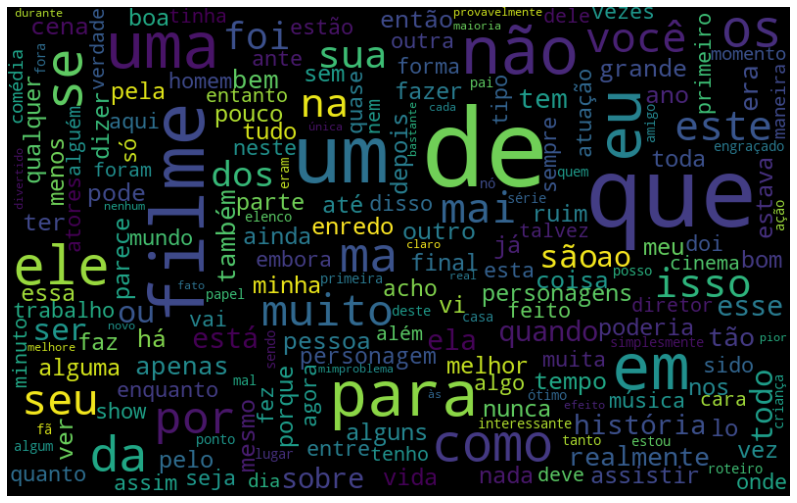

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,9))
plt.axis("off")
plt.imshow(nuvem_dePalavras,interpolation='bilinear')
plt.show()

In [23]:
resenha.query("sentiment=='pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [0]:
def nuvem_dePalavrasPositivas(texto, coluna_texto):
    texto_positivo = resenha.query("sentiment=='pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_dePalavras = WC(width=800,height=500, 
                          max_font_size=110,
                          collocations=False).generate(todas_palavras)
    plt.figure(figsize=(25,9))
    plt.axis("off")
    plt.imshow(nuvem_dePalavras,interpolation='bilinear')
    plt.show()



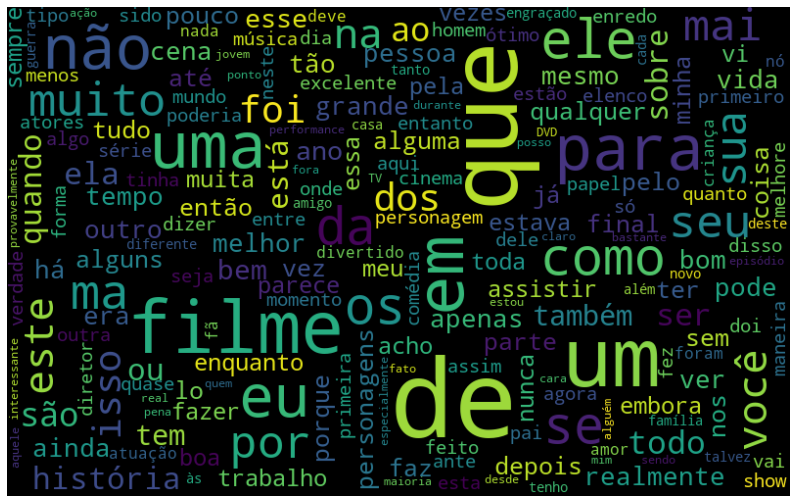

In [25]:
nuvem_dePalavrasPositivas(resenha,"text_pt")

In [0]:
def nuvem_dePalavrasNegativas(texto, coluna_texto):
    texto_negativo = resenha.query("sentiment=='neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_dePalavras = WC(width=800,height=500, 
                          max_font_size=110,
                          collocations=False).generate(todas_palavras)
    plt.figure(figsize=(25,9))
    plt.axis("off")
    plt.imshow(nuvem_dePalavras,interpolation='bilinear')
    plt.show()

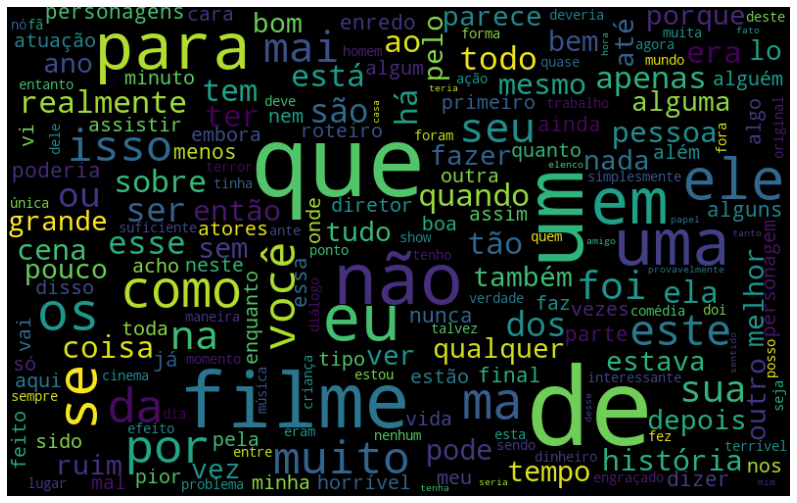

In [27]:
nuvem_dePalavrasNegativas(resenha,"text_pt")

In [28]:
import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [29]:
import nltk
from nltk import tokenize

frase = " Seu cd"
token_space = tokenize.WhitespaceTokenizer()

token = token_space.tokenize(frase)

print(token)

['Seu', 'cd']


In [0]:
token_resenha = token_space.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_resenha)
df_frequencia= pd.DataFrame({
                            "Palavra": list(frequencia.keys()),
                            "Frequencia": list(frequencia.values())
})

In [0]:
plot = df_frequencia.nlargest(columns="Frequencia",n=10)

In [33]:
!pip install seaborn

In [34]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#plt.figure(figsize=(15,10))
#ax = sns.barplot(data= plot,x="Palavra",y="Frequencia", color='blue')
#ax.set(ylabel="Contagem")
#plt.show()

In [0]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_resenha = token_space.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_resenha)
    df_frequencia= pd.DataFrame({
                            "Palavra": list(frequencia.keys()),
                            "Frequencia": list(frequencia.values())
    })
    plot = df_frequencia.nlargest(columns="Frequencia",n=quantidade)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data= plot,x="Palavra",y="Frequencia", color='blue')
    ax.set(ylabel="Contagem")
    plt.show()

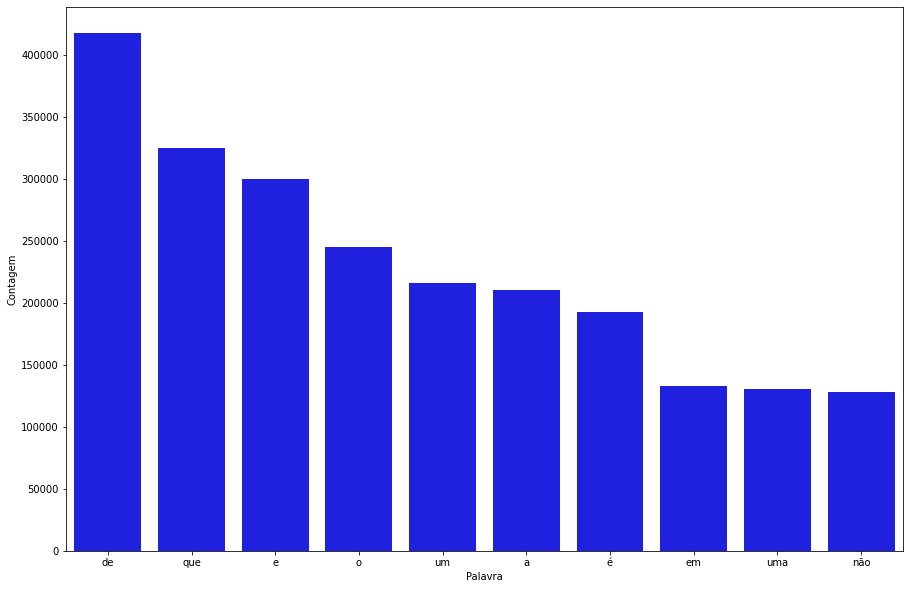

In [37]:
pareto(resenha,"text_pt",10)

#StopWords

In [0]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [39]:
print(palavras_irrelevantes)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [0]:
frase_processada = list()
for opiniao in resenha.text_pt:
    #para cada frase acessada vamos tokeniza-la e verificar se cada token é pertecentes a nossa lista de stop
    #words
    nova_frase = list()
    palavras_texto = token_space.tokenize(opiniao)
    for palavra in palavras_texto:
        #para cada palavra vamos verificar se a mesma esta na nossa lista de 
        #palavras_irrelevantes
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))#aqui temos a frase sem os stopWords


resenha["tratamento1"] = frase_processada


In [41]:
classifica_texto(resenha,"tratamento1","classificacao")


0.6607359482410028

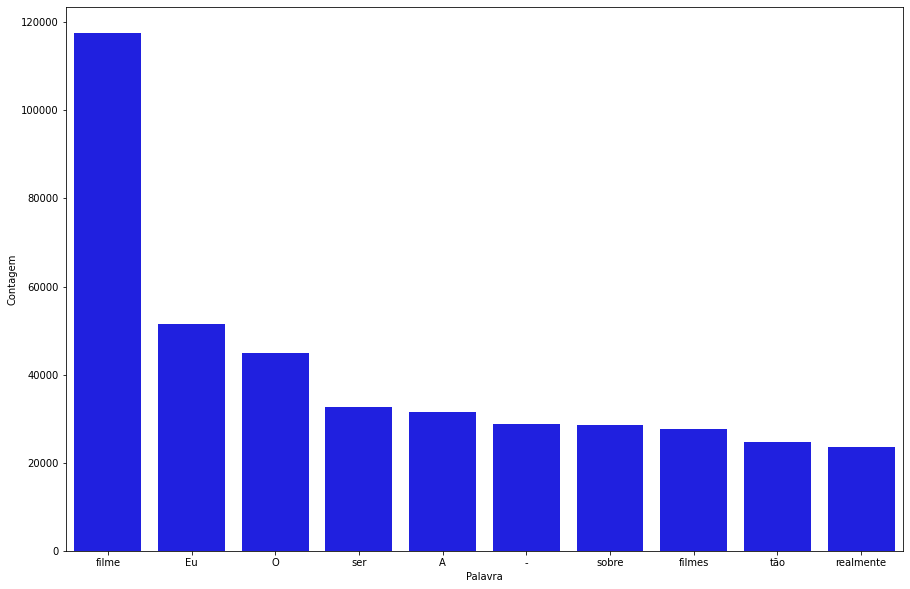

In [42]:
pareto(resenha,"tratamento1",10)